In [ ]:
!pip install factor_analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
url= ('https://raw.githubusercontent.com/syifaghaisani/UAS-Statistika-Multivariat/main/diabetes.csv')
data = pd.read_csv(url)
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **01. PCA (Principal Component Analysis)**

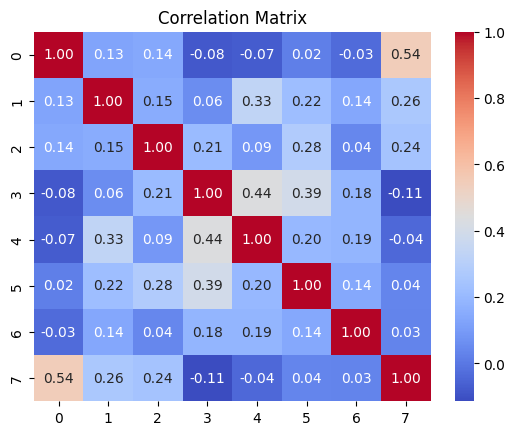

KMO All: [0.58769483 0.60775453 0.64978379 0.57993631 0.58347159 0.67577371
 0.77785465 0.59533978 0.65135842]
KMO Model: 0.6179296468139887


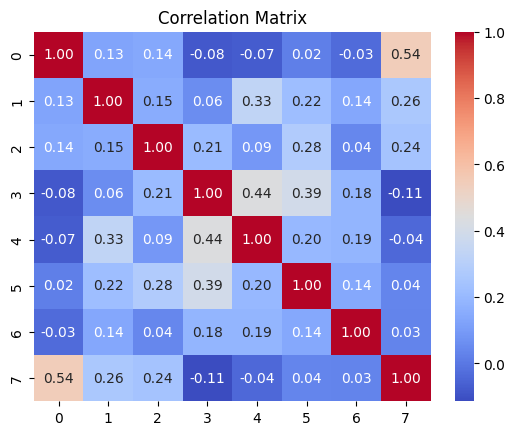

Bartlett’s Test of Sphericity: chi-square value = 948.226, p-value = 0.000


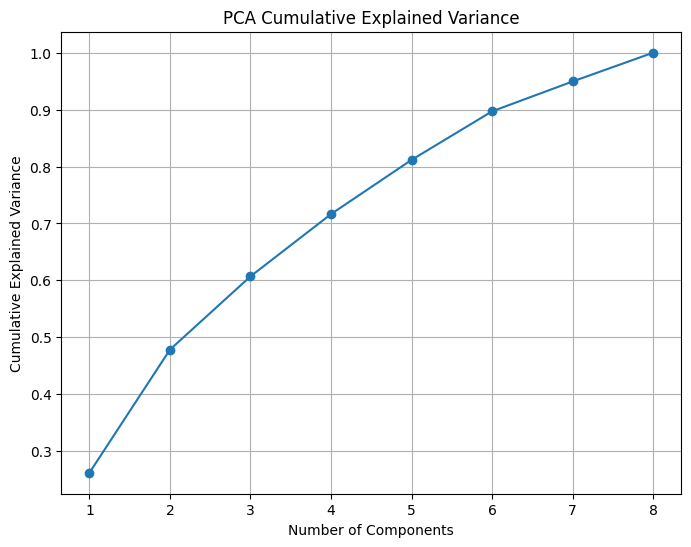

Number of components to explain 80% variance: 5


In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
# Pisahkan fitur dan target
features = data.drop('Outcome', axis=1)
target = data['Outcome']

# 1. Standardisasi Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Uji Keterkaitan Antar Variabel (Multikolinearitas)
# Matriks korelasi
corr_matrix = np.corrcoef(scaled_features, rowvar=False)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Menghitung KMO
kmo_all, kmo_model = calculate_kmo(data)

# Menampilkan hasil KMO
print("KMO All:", kmo_all)
print("KMO Model:", kmo_model)


# Plot heatmap dari matriks korelasi
corr_matrix = np.corrcoef(scaled_features, rowvar=False)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Uji Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(features)
print(f'Bartlett’s Test of Sphericity: chi-square value = {chi_square_value:.3f}, p-value = {p_value:.3f}')

# 5. PCA
pca = PCA()
pca.fit(scaled_features)

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid()
plt.show()

# Menampilkan jumlah komponen yang dibutuhkan untuk menjelaskan 80% variansi
num_components = (cumulative_explained_variance >= 0.80).argmax() + 1
print(f'Number of components to explain 80% variance: {num_components}')

Data setelah PCA:
        PCA 1     PCA 2
0    1.068503  1.234895
1   -1.121683 -0.733852
2   -0.396477  1.595876
3   -1.115781 -1.271241
4    2.359334 -2.184819
..        ...       ...
763  1.562085  1.923150
764 -0.100405 -0.614181
765 -0.283475  0.097065
766 -1.060324  0.837062
767 -0.839892 -1.151755

[768 rows x 2 columns]


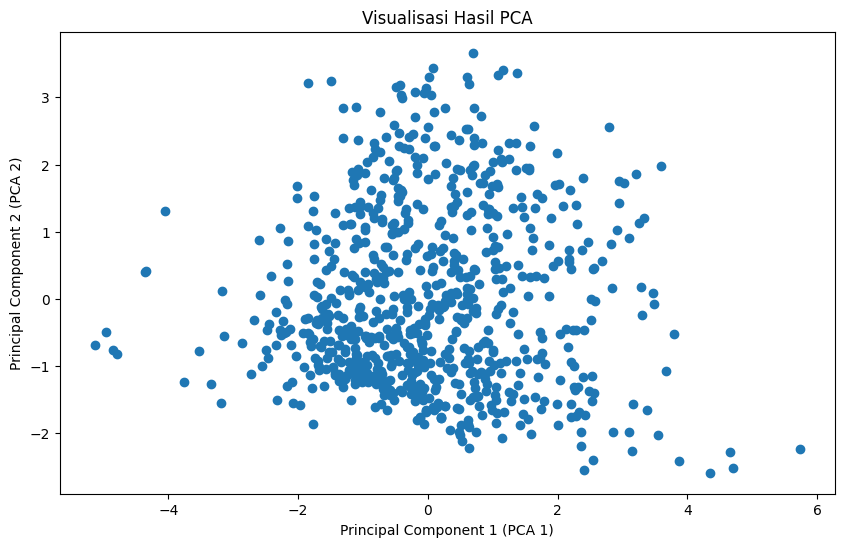

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualisasi hasil PCA
#plt.figure(figsize=(8, 6))
#plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Outcome'], cmap='viridis')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('PCA of Diabetes Dataset')
#plt.colorbar()
#plt.show()

dfPCA = pd.DataFrame(data=pca_result, columns=['PCA 1','PCA 2'])
print('Data setelah PCA:')
print(dfPCA)
plt.figure(figsize=(10,6))
plt.scatter(dfPCA['PCA 1'], dfPCA['PCA 2'])
plt.title('Visualisasi Hasil PCA')
plt.xlabel('Principal Component 1 (PCA 1)')
plt.ylabel('Principal Component 2 (PCA 2)')
plt.show()
# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# **02. K-Means (Non Hierarchical Clustering)**

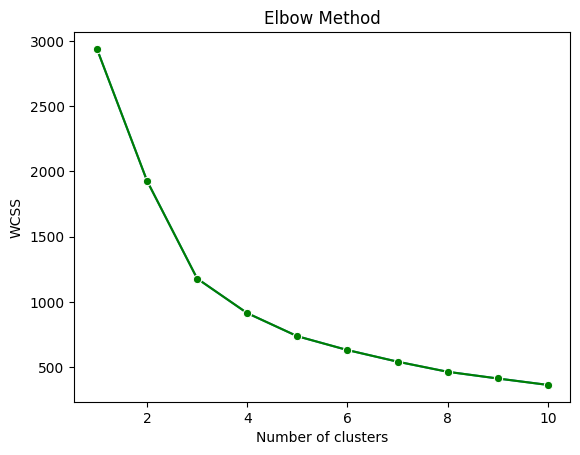

In [ ]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster yang optimal (contoh: menggunakan Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)
# Plotting Elbow Method
plt.plot(range(1, 11), wcss)
sns.lineplot(x=range(1,11), y=wcss, marker='o', color='green')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

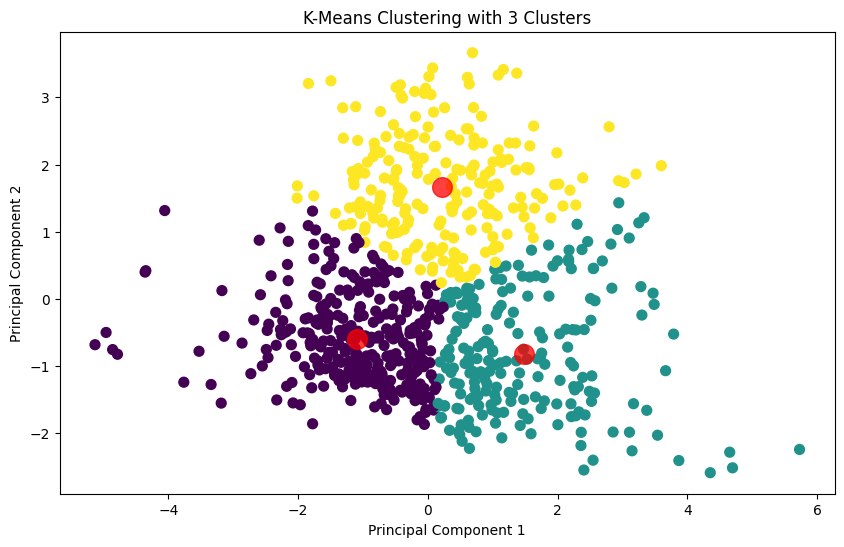

In [ ]:
from sklearn.cluster import KMeans
# Memilih fitur untuk clustering (kecuali kolom 'Outcome')
features = data.drop(columns=['Outcome'])

# Standardisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menentukan jumlah cluster optimal
best_k = 3

# Melakukan clustering dengan K-means
kmeans = KMeans(n_clusters=best_k, random_state=0)
y_kmeans = kmeans.fit_predict(pca_result)

# Plotting hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plotting centroid cluster
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='o')
plt.title(f'K-Means Clustering with {best_k} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# **03. Hierarchical Clustering**

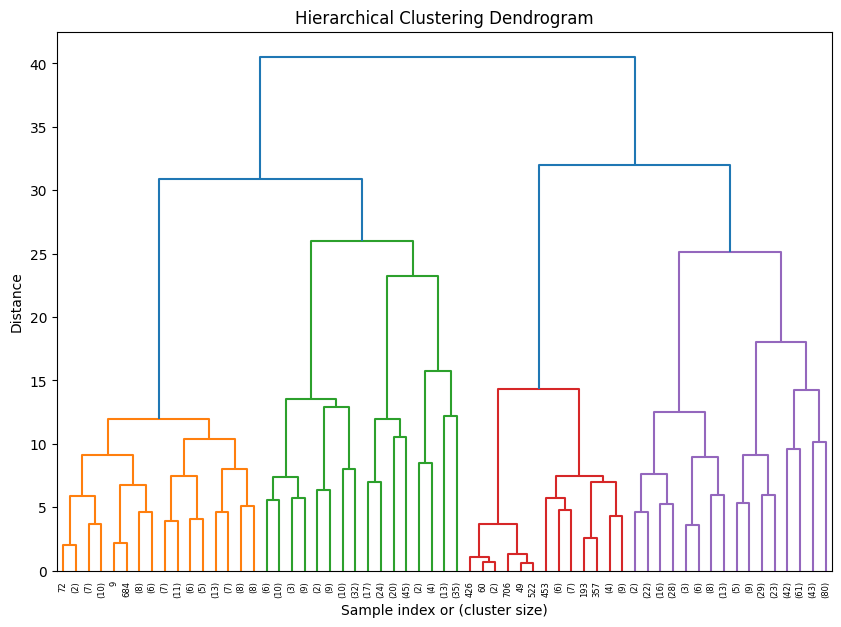

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Cluster  
0                     0.627   50        1       30  
1                     0.351   31        0       82  
2                     0.672   32        1        7  
3                     0.167   21        0       82  
4                     2.288   33        1       41  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#data = df.select_dtypes(include=[np.number]).dropna()

# Anda bisa mengganti 'ward' dengan 'single', 'complete', 'average', dsb.
#linked = linkage(scaled_features, method='average')
#plt.figure(figsize=(10, 7))
#dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
#plt.title('Hierarchical Clustering Dendrogram')
#plt.show()


Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Optional: Cut the dendrogram to form flat clusters
from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters (e.g., using a distance threshold)
max_d = 4  # This is an example value; you may need to adjust based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows of the data with cluster labels
print(data.head())

# **04. SVD (Singular Value Decomposition)**

Matriks U:
 [[-0.02664203  0.03386683  0.0034114  ...  0.01559974  0.04782915
  -0.05528086]
 [ 0.02796803 -0.02012578 -0.02535308 ... -0.0177462   0.04216045
  -0.02009772]
 [ 0.00988574  0.04376668  0.06261219 ... -0.00174774 -0.06421189
  -0.06062704]
 ...
 [ 0.00706817  0.002662   -0.00274505 ... -0.02350863 -0.01868806
  -0.01642243]
 [ 0.02643811  0.02295632  0.01511468 ...  0.0066956   0.06573326
   0.03031805]
 [ 0.02094185 -0.03158672 -0.03588779 ... -0.00655537  0.01365755
  -0.02927419]]

Nilai Singular (Sigma):
 [40.10590727 36.4632608  28.12037943 25.9307984  24.19670408 22.89669413
 17.95602478 17.62460929]

Matriks V^T:
 [[-0.1284321  -0.39308257 -0.36000261 -0.43982428 -0.43502617 -0.45194134
  -0.27061144 -0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]
 [ 0.08069115 -0.40432871  0.05598649  0.03797608 -0.3

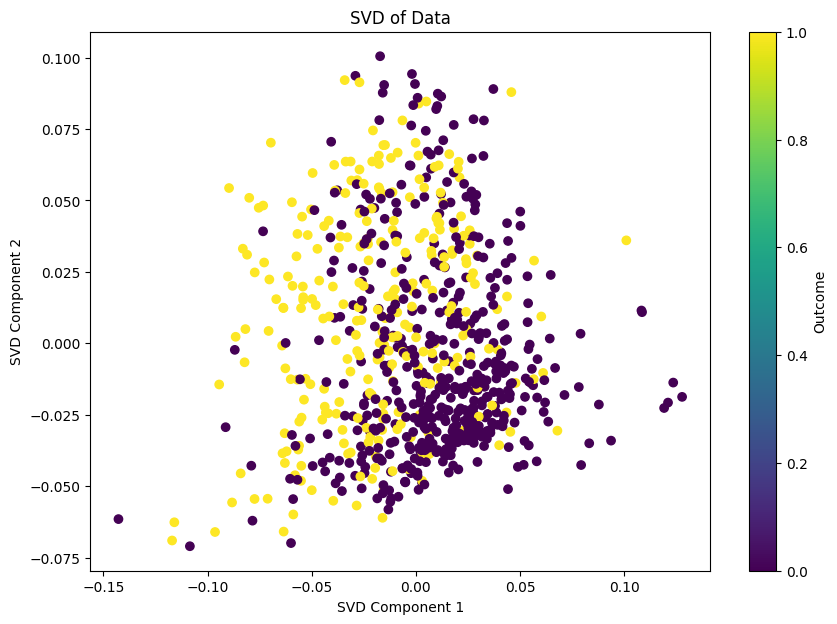

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np # Added import for numpy

features = data.drop(columns=['Outcome'])
outcome = data['Outcome']
# Melakukan dekomposisi SVD
U, Sigma, VT = np.linalg.svd(scaled_features, full_matrices=False)

# Menampilkan matriks U, Sigma, dan VT
print("Matriks U:\n", U)
print("\nNilai Singular (Sigma):\n", Sigma)
print("\nMatriks V^T:\n", VT)
# Explained variance ratio
explained_variance = (Sigma[:2]**2) / (np.sum(Sigma**2))
print("Varians Rasio setiap komponen:", explained_variance)
print("Total varians rasio:", explained_variance.sum())
# Visualisasi hasil
# Mengambil dua komponen pertama untuk visualisasi
U_reduced = U[:, :2]
Sigma_reduced = np.diag(Sigma[:2])
VT_reduced = VT[:2, :]

# Proyeksi data ke ruang baru
X_reduced = np.dot(np.dot(U_reduced, Sigma_reduced), VT_reduced)

# Plotting dengan warna berdasarkan kategori Outcome
# Plotting the SVD results
plt.figure(figsize=(10, 7))
plt.scatter(U_reduced[:, 0], U_reduced[:, 1], c=data['Outcome'], cmap='viridis') # Changed U_2d to U_reduced
plt.colorbar(label='Outcome')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD of Data')
plt.show()

# **05. Factor Analysis**

KMO All: [0.58769483 0.60775453 0.64978379 0.57993631 0.58347159 0.67577371
 0.77785465 0.59533978 0.65135842]
KMO Model: 0.6179296468139887
Bartlett’s Test of Sphericity: chi-square value = 948.226, p-value = 0.000
Eigenvalues: [2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]

Komponen Faktor:
    Factor1   Factor2
0  0.395674  1.268609
1 -0.321996 -0.347969
2 -0.688833  0.088504
3 -0.238297 -1.031350
4  1.385369 -0.213186


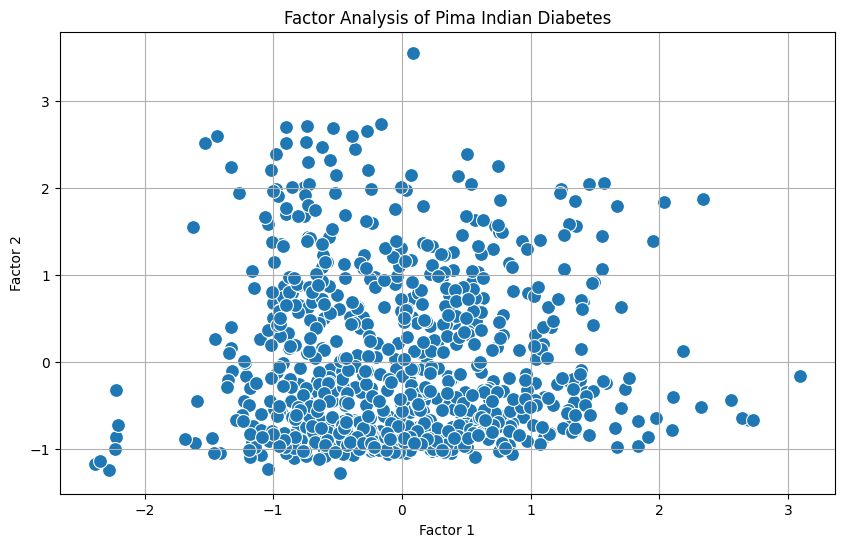

In [ ]:
print("KMO All:", kmo_all)
print("KMO Model:", kmo_model)

print(f'Bartlett’s Test of Sphericity: chi-square value = {chi_square_value:.3f}, p-value = {p_value:.3f}')
# Melakukan Analisis Faktor
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(scaled_features)
fa_components = fa.transform(scaled_features)

# Menghitung eigenvalue dari matriks kovarians
cov_matrix = np.cov(scaled_features, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f'Eigenvalues: {eigenvalues}')

# Membuat DataFrame untuk komponen faktor
factor_df = pd.DataFrame(data=fa_components, columns=['Factor1', 'Factor2'])

# Menampilkan hasil Analisis Faktor
print("\nKomponen Faktor:")
print(factor_df.head())

# Menampilkan plot Analisis Faktor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Factor1', y='Factor2', data=factor_df, palette='viridis', s=100)
plt.title('Factor Analysis of Pima Indian Diabetes')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.grid(True)
plt.show()

# **06. Discriminant Analysis**

In [ ]:
from scipy.stats import shapiro

# Melakukan uji Shapiro-Wilk untuk setiap kolom
normality_test_results = data.apply(lambda x: shapiro(x.dropna()))
normality_test_results


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,9.042832e-01,9.701049e-01,8.189233e-01,9.046278e-01,7.220209e-01,9.499890e-01,8.365189e-01,8.747659e-01,6.025096e-01,9.209839e-01
1,1.610010e-21,1.987465e-11,1.584494e-28,1.751800e-21,7.915340e-34,1.840759e-15,2.477799e-27,2.401830e-24,1.292262e-38,1.285667e-19


In [ ]:
import statsmodels.api as sm


# Fungsi untuk menghitung VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [sm.OLS(df[col], sm.add_constant(df.drop(columns=col))).fit().rsquared for col in data.columns]
    vif_data["VIF"] = 1 / (1 - vif_data["VIF"])
    return vif_data

# Menghapus baris yang memiliki nilai NaN, jika ada
df = data.dropna()

# Hitung VIF untuk data
vif = calculate_vif(df)
print(vif)

                    feature       VIF
0               Pregnancies  1.541997
1                   Glucose  1.623625
2             BloodPressure  1.194721
3             SkinThickness  1.527147
4                   Insulin  1.478157
5                       BMI  1.383245
6  DiabetesPedigreeFunction  1.087439
7                       Age  2.227336
8                   Outcome  1.435341
9                   Cluster  2.345462


#**QDA**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur dan target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menerapkan QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# Evaluasi model QDA
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f'Accuracy QDA: {accuracy_qda}')

# Confusion matrix dan classification report
print('\nConfusion Matrix QDA:')
print(confusion_matrix(y_test, y_pred_qda))
print('\nClassification Report QDA:')
print(classification_report(y_test, y_pred_qda))

Accuracy QDA: 0.7662337662337663

Confusion Matrix QDA:
[[80 19]
 [17 38]]

Classification Report QDA:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

